<h1 style="text-decoration: underline;"> <b> Heap-Sort Notebook </b> </h1>`

<h2> Trees </h2>

<h3> Tree Terminology </h3>
<p> 
<li> Node:        structure that contains data and connections to other nodes. All nodes have one Parent node, except for the Root Node. Nodes may have zero or many Child Nodes.</li> 
<li> Parent Node: the superior node of a given node is known as that given node’s Parent. </li>
<li> Child Node:  any subnode of a given node is known as that given node’s Child. </li>
<li> Root Node:   the topmost node in a tree.   </li>  
<li> Degree of a Node: the number of children a given node has. </li>
<li> Degree of a Tree: the maximum degree of a node within the tree. </li>
<li> Edge: connection between nodes. </li>
<li> Level: the number of edges along the unique path of a node and its root. </li>
<li> Width: the number of nodes in a level. </li>
<li> Size of a Tree: the number of nodes in the Tree. </li>
<li> Leaf Node: a Node that does not have any Child Nodes.
<li> Height of a Tree: the length of the longest downward path from the Root Node of the Tree to a Leaf Node. </li>
</p>

<h3> Defintion of Tree </h3>
<p> The 'Tree' data structure is an abstract data type that represents data in a hierarchical format consisting of a series of connected nodes.     </p>
<br>
<p> Below is code to generate a list of integers and display that list as a Tree. </p>


In [28]:
# Import library to work with Plots
import matplotlib.pyplot as plt

# Change default plot size.
plt.rcParams["figure.figsize"] = (20, 8)

# Import library to work with Graphs.
import networkx as nx

# Import library for Math functions.
import math

# IMport library for Numerical and random functions.
import numpy as np

# Create a list of integers.
L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10]
L

[1, 15, 3, 18, 6, 9, 2, 4, 8, 10]

In [29]:
# function to create and display Tree
def DrawTree(L, highlight=None):
  # Create tree.
  T = nx.balanced_tree(4, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='gold', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

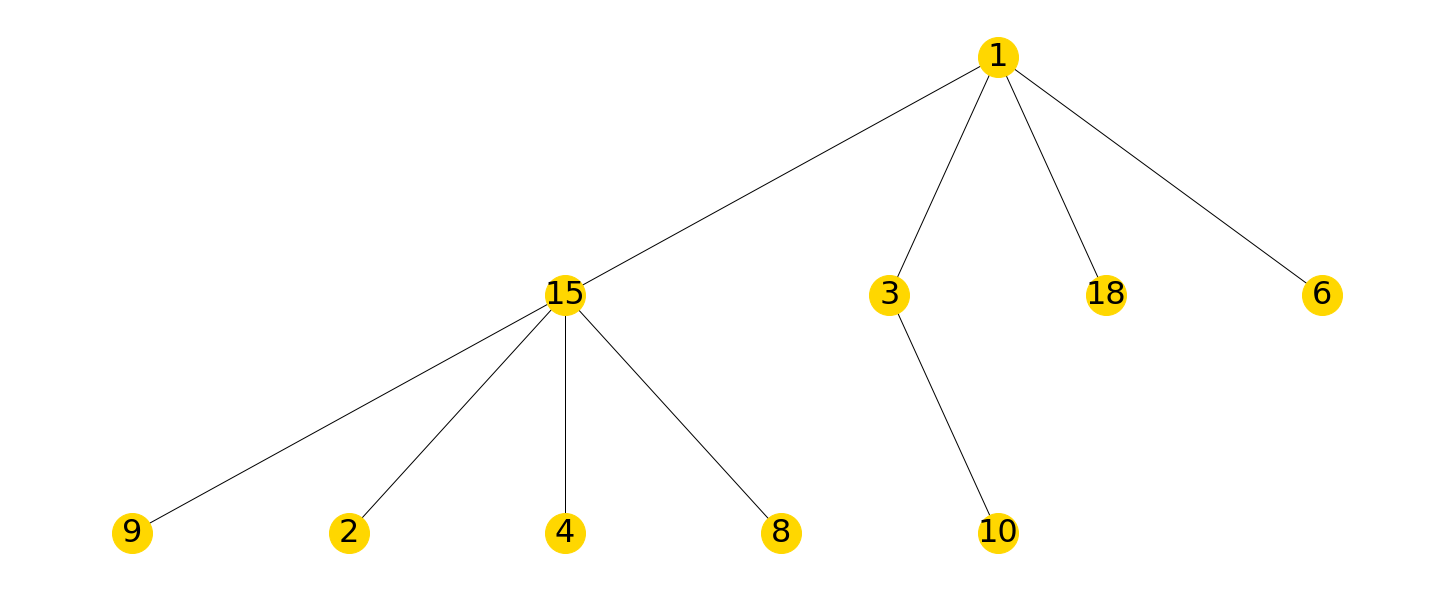

In [30]:
DrawTree(L)

<p> <small> The Tree displayed above is the output of the 'DrawTree' function. The function has taken the list of integers 'L', L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10], and displayed it in a Tree data structure. </small> </p>
<br>
<ul> Examples of Tree Terminology Using Generated Tree</ul>
<li> The created tree contains ten nodes. Each node contains one of the integers from the list 'L'. </li>
<li> Node '15' is the Parent node of nodes '9', '2', '4' and '8'. </li>
<li> Node '10' is the Child node of node '3'. </li>
<li> The node '1' is the Root Node. </li>
<li> The Degree of node '3' is one. </li>
<li> The Degree of the Tree is 4. </li>
<li> The Tree contains three levels. </li>
<li> The Width of Level two in the Tree is four. </li>
<li> The Size of the Tree is ten. </li>


<h3> Defintion of Rooted Binary Tree </h3>
<p> A Rooted Binary Tree is a type tree data structure in which one vertex has been designated the Root and each node has at most two children.        </p>
<br>
<p> Below is code to generate a list of integers and display that list as a Rooted Binary Tree. </p>


In [31]:
# function to create and display Binary Rooted Tree
def DrawBinaryTree(L, highlight=None):
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='gold', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

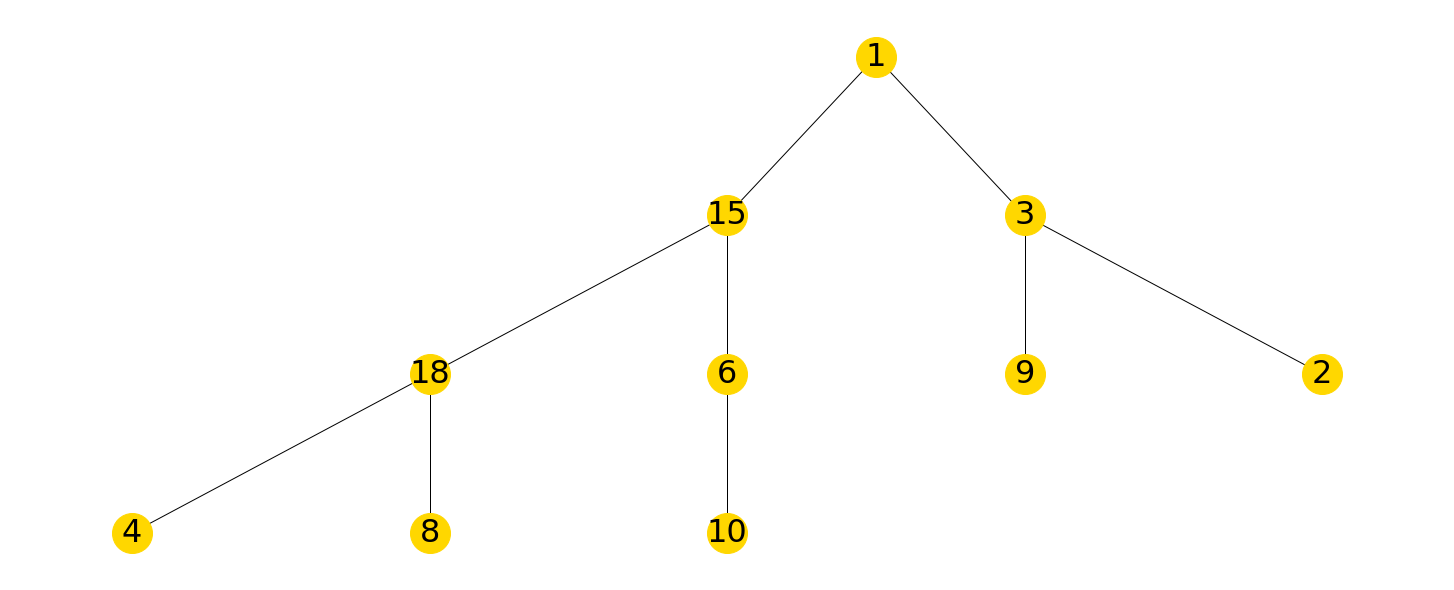

In [32]:
DrawBinaryTree(L)

<p> <small> The Tree displayed above is the output of the 'DrawBinaryTree' function. The function has taken the list of integers 'L', L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10], and displayed it in a Rooted Binary Tree data structure. </small> </p>
<br>

<h3> Difference Between a Tree and a Rooted Binary Tree </h3>
<p> Using the generated trees, we can visualise their differences. Though both trees are of the same size, their different sized widths create two distinct shapes. The widths of the trees are limited by the maximum Degree of its nodes. The first tree was created with a maximum node Degree of four. This means that each node could have from zero up to four Children. The form of the Rooted Binary Tree limits its nodes to a maximum of two Children. Due to this diffence in maximum node Degree, the Rooted Binary Tree has a larger height, four Levels, than that of the first Tree, 3 levels. </p>

<br>
<h2> Heap Sort </h2>

<h3> Defintion of Heap Sort </h3>
<p> Heap Sort is a comparison-based sorting algorithm. This means that the algorithm compares elements in a list in order to arrange them into a final sorted list. Heap Sort will split a list into a sorted section and an unsorted section. It then iteratively adds elements from the unsorted section to the sorted based on the desired comparison, “greater than” or “less than”, until the complete list has been sorted.      </p>
<p> The Heap Sort Algorithm is comprised of two parts. In the first part, the data to be sorted is transformed into a Heap. A Heap is a Binary Tree data structure. There are two different types of Heaps; a Max-Heap and a Min-Heap. In a Max-Heap every Parent's Key must be greater than its Children Nodes. The goal with the Max-Heap approach is to compare the elements of the list and swap their positions in the Tree until the Root Node represents the element that is the largest, or equal to the largest, in the list.</p>
<p> In a Min-Heap every Parent's Key must be smaller than its Children Nodes. The goal with the Min-Heap approach is to compare the elements of the list and swap their positions in the Tree until the Root Node represents the element that is the smallest, or equal to the smallest, in the list. </p>
<p> In the second part of the Heap Sort Algorithm, the element represented by the Root Node, which will be either the largest or smallest element in the list depending, is removed from the Heap and placed into an array. After the element has been removed, the Heap is updated to find the next largest/smallest element which will also be placed into the array. The process is repeated until every element has been removed from the Heap and the result is a sorted array of the elements. </p>
<br>

<h3> Step-Through of Heap Sort Algorithm Using Max Heap </h3>

<p> Step 1). In this step-through, we will use the Heap Sort Algorithm to sort the list L = [6, 14, 9, 12, 21, 1, 30]. The first step is to represent the list as a Rooted Binary Tree.</p>

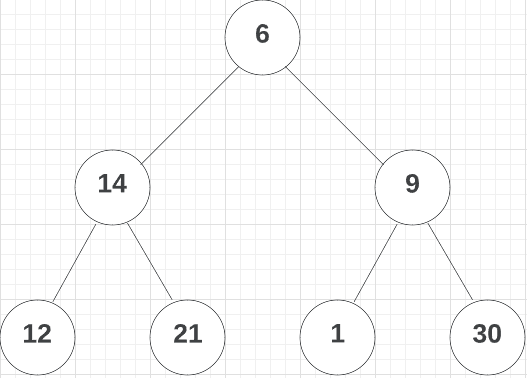

<br>
<p> Step 2). Begin the process of Heapifying the Tree. We go to the last Parent Node in the tree, which is '9'. We compare this Node to its Children and see that its Right Child '30' is greater than '9'. We then swap the positions of '9' and '30'. </p>

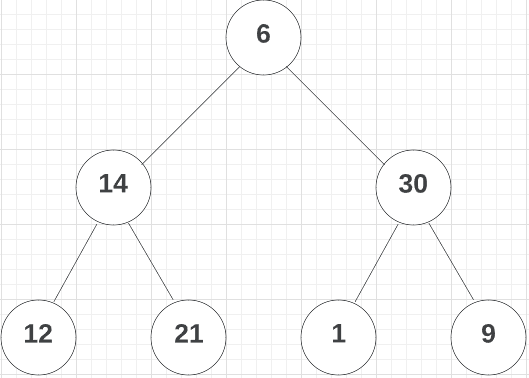

<br>
<p> Step 3). We go to the second last Parent in the Tree and compare it to its Children. We see that '21' is larger than '14' so we swap their positions on the Tree. </p> 

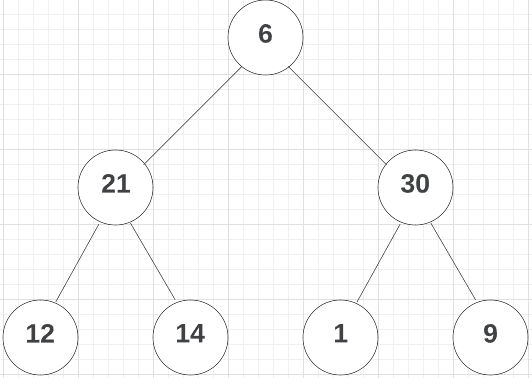

<br>
<p> Step 4). We compare the remaining Parent in the Tree, which is the Root Node, to its Children. As both Children are larger than the Parent, we will swap the places of the Parent, '6', and the Largest of its Children, '30'. </p>

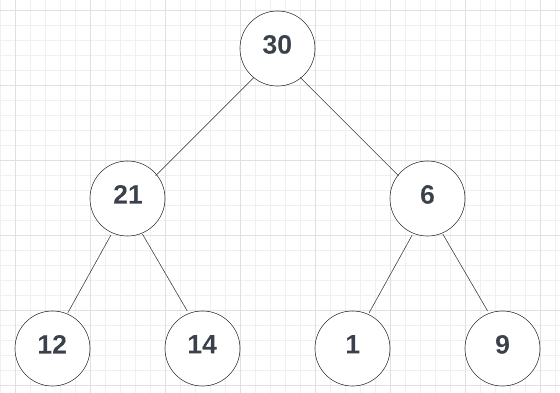

<br>
<p> Step 5). We compare the Parent Nodes with their Children again. We see that '9' is greater than '6', so we swap their positions in the Tree. After this swap, we see that all Parent Nodes in the Tree are now greater than their Children Nodes. This means that we have successfully created a Max-Heap. </p>

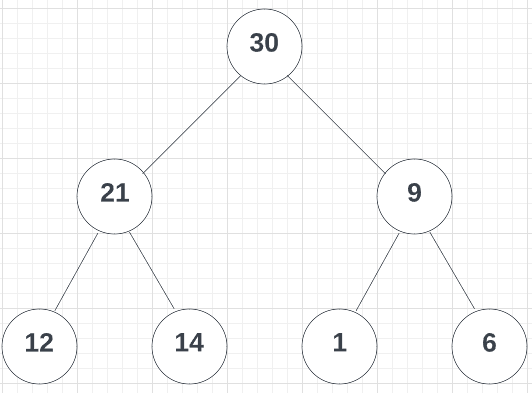

<br>
<p> Step 6). After creating the Max-Heap, we swap the position of the Root Node, '30', with the last Node in the Tree, '6'. Once '30' is at the last position in the Tree, it is in the sorted section of the List and will not be considered for position swapping in future sifting. (Sorted Nodes in the images are denoted by the color red) </p>

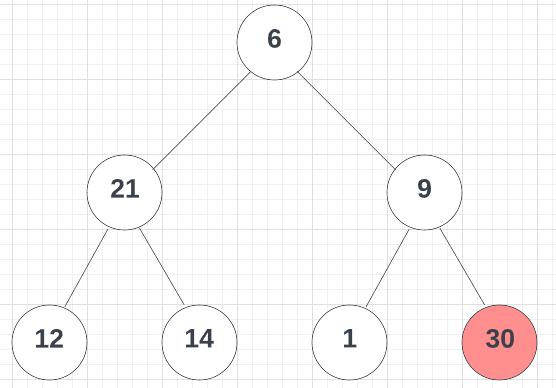

<h3> Heap Sort Implementation </h3>

In [33]:
def swap (listToSwap, i, j):
    '''swap the positions of elements in the tree'''
    listToSwap[i], listToSwap[j] = listToSwap[j], listToSwap[i]

def siftDownMax(listToSift, index, upper):
    '''move largest element, root node, down the tree to make way for the next largest. maintain the max-heap'''
    while (True):
        # get the indices of the child nodes
        left, right = ((index * 2) + 1), ((index * 2) + 2)
        
        #if the Parent has two children
        if max(left, right) < upper:
            
            #if Parent is larger than both Children, break
            if listToSift[index] >= max(listToSift[left], listToSift[right]): break
                
            #if left Child is larger than Parent swap left Child and Parent 
            elif listToSift[left] > listToSift[right]:
                swap(listToSift, index, left)
                index = left #update Parent
                
            #else swap right Child and Parent
            else:
                swap(listToSift, index, right)
                index = right #update Parent
                
        #if the Parent has just a left Child        
        elif left < upper:
            
            #if Child is larger than Parent then swap positions, if not then break
            if listToSift[left] > listToSift[index]:
                swap(listToSift, index, left)
                index = left
            else: break
         
        #if the Parent has just a right Child
        elif right < upper:
            
             #if Child is larger than Parent then swap positions, if not then break
            if listToSift[right] > listToSift[index]:
                swap(listToSift, index, right)
                index = right
            else: break
        
        # if there are no children, break
        else: break

def maxHeapSort(listToSort):
    '''heapifys using Max-Heap and then sorts the list'''
    for j in range((len(listToSort) - 2) // 2, -1, -1):
        siftDownMax(listToSort, j, len(listToSort))
    
    for end in range(len(listToSort)-1, 0, -1):
        swap(listToSort, 0, end)
        siftDownMax(listToSort, 0, end)
        
L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10]
maxHeapSort(L)
L

[1, 2, 3, 4, 6, 8, 9, 10, 15, 18]

<p> <small> The above code uses the Heap Sort Algorithm and a Max-Heap to sort the list 'L'. The output is an ordered array that contains the elements of list 'L' in ascending order.  </small> </p>
<br>

In [34]:
def siftDownMin(listToSift, index, upper):
    '''move smallest element, root node, down the tree to make way for the next smallest. maintain the max-heap'''
    while (True):
        # get the indices of the child nodes
        left, right = ((index * 2) + 1), ((index * 2) + 2)
        
        #if the Parent has two children
        if max(left, right) < upper:
            
            #if Parent is larger than both Children, break
            if listToSift[index] <= max(listToSift[left], listToSift[right]): break
                
            #if left Child is larger than Parent swap left Child and Parent 
            elif listToSift[left] < listToSift[right]:
                swap(listToSift, index, left)
                index = left #update Parent
                
            #else swap right Child and Parent
            else:
                swap(listToSift, index, right)
                index = right #update Parent
                
        #if the Parent has just a left Child        
        elif left < upper:
            
            #if Child is larger than Parent then swap positions, if not then break
            if listToSift[left] < listToSift[index]:
                swap(listToSift, index, left)
                index = left
            else: break
         
        #if the Parent has just a right Child
        elif right < upper:
            
             #if Child is larger than Parent then swap positions, if not then break
            if listToSift[right] < listToSift[index]:
                swap(listToSift, index, right)
                index = right
            else: break
        
        # if there are no children, break
        else: break

def minHeapSort(listToSort):
    '''heapifys using Min-Heap and then sorts the list'''
    for j in range((len(listToSort) - 2) // 2, -1, -1):
        siftDownMin(listToSort, j, len(listToSort))
    
    for end in range(len(listToSort)-1, 0, -1):
        swap(listToSort, 0, end)
        siftDownMin(listToSort, 0, end)
        
L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10]
minHeapSort(L)
L

[18, 10, 15, 8, 9, 6, 4, 2, 3, 1]

<p> <small> The above code uses the Heap Sort Algorithm and a Min-Heap to sort the list 'L'. The output is an ordered array that contains the elements of list 'L' in descending order.  </small> </p>
<br>

<br> 
<h2> Bubble Sort </h2>

<h3> Definition of Bubble Sort </h3>
<p> The Bubble Sort, or Sinking Sort, algorithm is another comparison-based sorting algorithm.  </p>
<p> In the Bubble Sort Algorithm, each element in a list is compared to the element after it. Based on the result of the desired comparison, either ‘greater than’ or ‘less than’, the elements will swap position in the list. The algorithm will pass through the list as many times as necessary, stopping when there are no more position swaps required. The list is sorted once no more position swaps are required. </p>

<h3> Bubble Sort Implementation </h3>

In [35]:
def bubbleSortAsc(items):
    for i in range(len(items)):
        for j in range((len(items) - i) - 1):
            if items[j] > items[j + 1]:
                items[j], items[j+ 1] = items[j + 1], items[j]
    return items

L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10]
bubbleSortAsc(L)
L

[1, 2, 3, 4, 6, 8, 9, 10, 15, 18]

<p> <small> The above code uses the Bubble Sort Algorithm to sort the list 'L'. The output is an ordered array that contains the elements of list 'L' in ascending order.  </small> </p>
<br>

In [36]:
def bubbleSortDesc(items):
    for i in range(len(items)):
        for j in range((len(items) - i) - 1):
            if items[j] < items[j + 1]:
                items[j], items[j+ 1] = items[j + 1], items[j]
    return items

L = [1, 15, 3, 18, 6, 9, 2, 4, 8, 10]
bubbleSortDesc(L)
L

[18, 15, 10, 9, 8, 6, 4, 3, 2, 1]

<p> <small> The above code uses the Bubble Sort Algorithm to sort the list 'L'. The output is an ordered array that contains the elements of list 'L' in descending order.  </small> </p>
<br>

<h1 style="text-decoration: underline;"> <b> End of Notebook </b> </h1>`